# SVM
- <font color = "red">from sklearn.svm import SVC</font>
    - 參數介紹：C代表建置model成本，如果Cost越高，代表low bias high variance
    - small "gamma" means a Gussain for large variance
    - large gamma means a high bias low variance
- <font color = "red">from sklearn.grid_search import GridSearchCV 一種比較偷懶的方式，透過不同組合找到絕佳的參數</font>
    - 但是不建議調整全部的參數，因為計算量大，所以 1. 先把資料清乾淨，2.只測試幾個參數就好 
    - Step1:先找出欲調整的參數(dict) => grid=GridSearchCV({model(SVC())},verbose={number})  Grid 是一個用我們所設定參數中找到最佳參數的 model
    - Step2：因為Grid是model，所以可以fit and predict：grid.fit(X_train,y_train) => grid.predict(X_test)
    - grid.best_params_ 取得最佳的參數
    - verbose ： 過程處理的文字顯現數量
- <font color="red">kernel function</font>
- by the way sklearn.dataset import 的load_dataset() 回傳是一個dictionaries
- 此外讀取資料表也可以用sns.load_dataset("iris")

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 

from sklearn.datasets import load_breast_cancer

In [2]:
data=sns.load_dataset("iris")

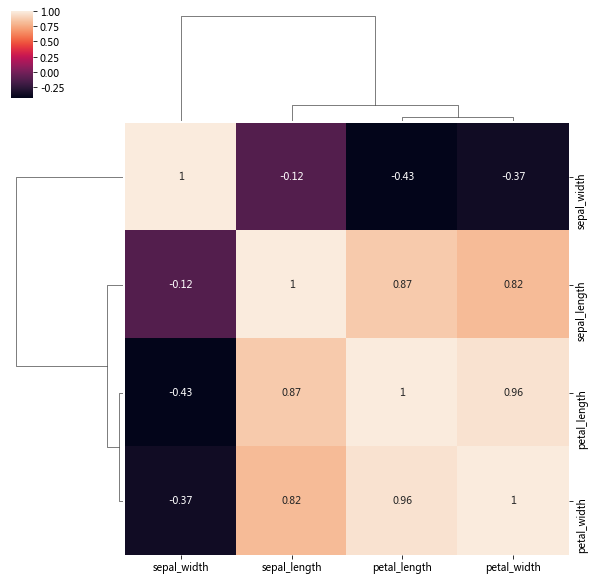

In [6]:
sns.clustermap(data.corr(),annot=True)

In [8]:
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [55]:
import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot,plot,download_plotlyjs
import cufflinks as cf

In [61]:
cf.go_offline(connected=True)

In [60]:
data["sepal_length"].iplot()

In [2]:
cancer=load_breast_cancer()

In [4]:
d=pd.DataFrame(cancer["data"],columns=cancer["feature_names"])

In [37]:
d.ix[2:30,0:4]

,mean radius,mean texture,mean perimeter,mean area
2,19.690,21.25,130.00,1203.0
3,11.420,20.38,77.58,386.1
4,20.290,14.34,135.10,1297.0
5,12.450,15.70,82.57,477.1
6,18.250,19.98,119.60,1040.0
7,13.710,20.83,90.20,577.9
8,13.000,21.82,87.50,519.8
9,12.460,24.04,83.97,475.9
10,16.020,23.24,102.70,797.8
11,15.780,17.89,103.60,781.0


In [6]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [17]:
print(cancer["DESCR"])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [18]:
df_feature=pd.DataFrame(cancer["data"],columns=cancer["feature_names"])

In [27]:
X=df_feature
y=cancer["target"] # 其實一個欄位的資料就好

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [51]:
model = SVC()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [52]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0  66]
 [  0 105]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        66
          1       0.61      1.00      0.76       105

avg / total       0.38      0.61      0.47       171



/Users/jiajiaping/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 上述有個問題，會發現預測的值都在都被分為同一類：
- 代表特徵需要處理（需要正規化）
- model的參數需要調整

# SVM Model 參數調整
- 可以考慮 Cost 與 gamma

In [34]:
from sklearn.grid_search import GridSearchCV

In [37]:
#從這兩個參數調整的變化來看，可以知道他們都是往high variance走的
params_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [55]:
#verbose 代表 處理過程文字的呈現
grid=GridSearchCV(model,params_grid,verbose=3)

In [56]:
grid.fit(X_train,y_train)
grid.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ C=10, gamma=0.1, score=0.631579 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.631579 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.636364 -   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ....................... C=10, gamma=0.01, score=0.631579 -   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ....................... C=10, gamma=0.01, score=0.631579 -   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ....................... C=10, gamma=0.01, score=0.636364 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...................... C=10, gamma=0.001, score=0.894737 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished


{'C': 10, 'gamma': 0.0001}

In [58]:
grid_predictions = grid.predict(X_test)

In [57]:
print(classification_report(y_test,grid_predictions))
print(confusion_matrix(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93        66
          1       0.94      0.97      0.96       105

avg / total       0.95      0.95      0.95       171

[[ 60   6]
 [  3 102]]
